<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x1F015387A30>


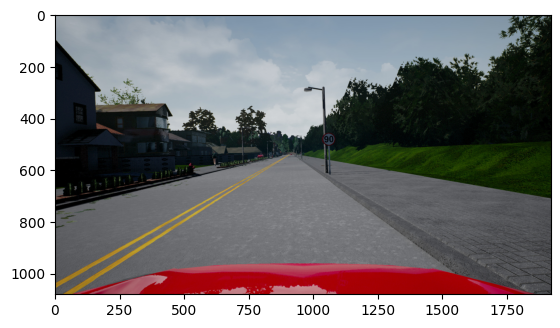

In [1]:
from PIL import Image
import utils.ss_transforms as sstr
import matplotlib.pyplot as plt
import numpy as np
im_src = Image.open("data/idda/images/102445_T01_CN_A.jpg")
print(im_src)
plt.imshow(im_src)

torch.Size([3, 540, 960])


c:\Users\ollob\anaconda3\envs\mldl23fl_6\lib\site-packages\torchvision\transforms\functional.py:442: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


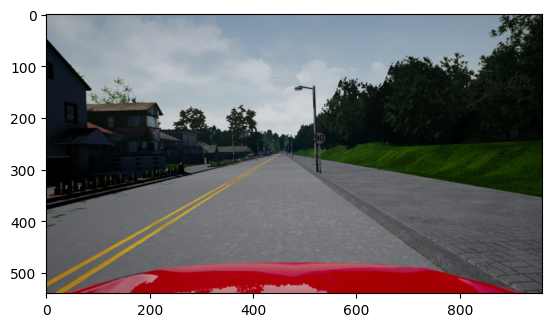

In [2]:

converter=sstr.Compose([sstr.Resize((540,960)),sstr.ToTensor()])
img=converter(im_src)
print(img.shape)
plt.imshow(img.permute(1,2,0))

torch.Size([3, 540, 960])
torch.Size([3, 540, 960]) torch.Size([3, 540, 960])
tensor([[[195896.6406,  42693.3594,   3543.0291,  ...,   8905.1602,
            3543.0291,  42693.3594],
         [ 50640.4062,  11762.8877,   9281.4697,  ...,   6793.2358,
            8723.4932,  18497.2949],
         [ 17256.1875,  13519.8047,   7670.8447,  ...,   3385.2434,
            3635.6697,  10797.0059],
         ...,
         [ 11854.8828,   8053.4951,   3854.7114,  ...,   2601.1875,
            5259.7510,  13287.9971],
         [ 17256.1855,  10797.0059,   3635.6699,  ...,   3834.8279,
            7670.8452,  13519.8037],
         [ 50640.4023,  18497.2949,   8723.4922,  ...,   4045.1396,
            9281.4697,  11762.8877]],

        [[188084.6562,  36450.1992,    609.7504,  ...,   9026.9287,
             609.7502,  36450.1992],
         [ 32255.4414,  10267.2432,   7031.4546,  ...,   7243.2407,
            8486.0605,  25727.6660],
         [ 37114.1562,  21109.6602,   8764.3535,  ...,   3210.0247

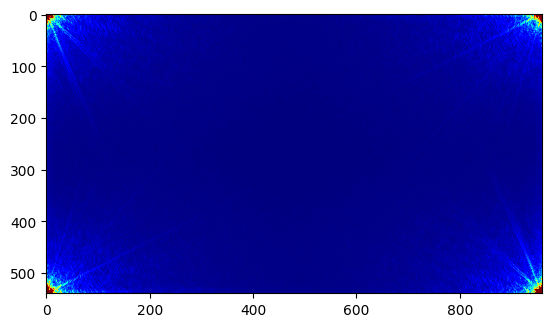

In [3]:
import torch
im_fft=torch.fft.fft2(img)
print(im_fft.shape)
im_ampl=im_fft.abs()
im_phase=im_fft.angle()
print(im_ampl.shape,im_phase.shape)
print(im_ampl)
plt.imshow(im_ampl[1]/im_ampl[1].max(),cmap='jet',vmax=0.005)

In [4]:
print(im_ampl[:,:5,:5])
print(im_ampl[:,-5:,:5])

tensor([[[195896.6406,  42693.3594,   3543.0291,   8905.1602,   2512.2839],
         [ 50640.4062,  11762.8877,   9281.4697,   4045.1396,   4983.2549],
         [ 17256.1875,  13519.8047,   7670.8447,   3834.8279,   3812.0457],
         [ 11854.8848,  13287.9971,   5259.7515,   2601.1875,   3827.2654],
         [  3426.9194,   1898.5870,   5566.7852,   1850.2732,   2695.0229]],

        [[188084.6562,  36450.1992,    609.7504,   9026.9268,   2035.1444],
         [ 32255.4414,  10267.2432,   7031.4546,   3361.1819,   5283.2202],
         [ 37114.1562,  21109.6602,   8764.3535,   3298.5874,   4675.5903],
         [ 11464.6416,   8366.2275,   7117.2900,   2665.3755,   3313.8284],
         [ 15797.2920,   5254.7778,   6051.6504,    602.5627,   3254.8179]],

        [[190596.4375,  42261.2617,    928.6702,   9938.3779,   2646.0984],
         [ 41533.9883,  14688.5576,   6825.2261,   4454.2827,   6303.9219],
         [ 38793.1094,  18651.5918,   9008.4805,   1242.6222,   5900.1382],
        

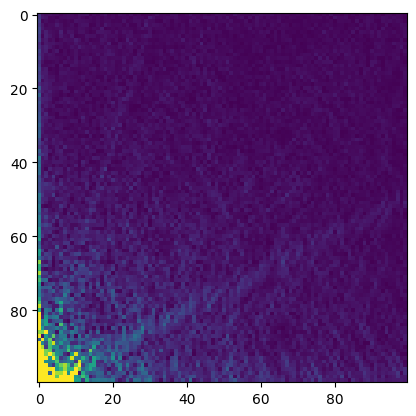

In [5]:
plt.imshow(im_ampl[1,-100:,:100],vmax=2000)

In [6]:
from utils.FDA import extractClientsStyles

styles=extractClientsStyles(11)

Extracting style of T02_CN_A_U1
Extracting style of T02_CN_A_U2
Extracting style of T03_CS_A_U1
Extracting style of T03_CS_A_U2
Extracting style of T01_CN_J_U1
Extracting style of T01_CN_J_U2
Extracting style of T01_CS_J_U1
Extracting style of T01_CS_J_U2
Extracting style of T03_CN_A_U1
Extracting style of T03_CN_A_U2
Extracting style of T02_CS_A_U1
Extracting style of T02_CS_A_U2
Extracting style of T03_CS_J_U1
Extracting style of T03_CS_J_U2
Extracting style of T01_CN_A_U1
Extracting style of T01_CN_A_U2
Extracting style of T02_CN_J_U1
Extracting style of T02_CN_J_U2
Extracting style of T02_CS_J_U1
Extracting style of T02_CS_J_U2
Extracting style of T01_CS_A_U1
Extracting style of T01_CS_A_U2
Extracting style of T03_CN_J_U1
Extracting style of T03_CN_J_U2


In [7]:
print(styles)

{'T02_CN_A_U1': {'pos': tensor([[[220682.8750,  25517.7266,  10766.0430,   6996.4092,   3720.1873,
            4006.0613],
         [ 40003.7500,  14343.4775,   9587.3779,   5086.8745,   3751.0996,
            3085.4395],
         [ 11754.3945,   9322.2148,   5456.9629,   4837.6836,   3550.2637,
            2674.7947],
         [ 16760.5371,   6094.3252,   3905.2737,   3738.3613,   3104.5278,
            2406.7068],
         [  9386.6309,   4727.2261,   3164.9077,   2755.2612,   2978.7390,
            2339.6279],
         [  8515.7998,   3126.2380,   3104.3228,   2508.1670,   2209.7065,
            1821.4139]],

        [[207244.7344,  22900.1230,  11852.2490,   7283.1479,   4276.5630,
            4270.6670],
         [ 23044.4316,  16055.5576,   9588.5371,   5058.5396,   4008.9873,
            3104.3135],
         [ 28558.2324,  10873.7588,   6194.4175,   5332.4824,   3676.0688,
            2881.2859],
         [  9063.8633,   5744.5654,   4852.8960,   3676.9866,   3421.1106,
        

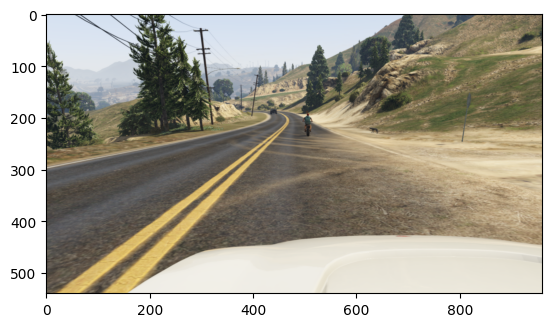

In [8]:
from utils.FDA import applyStyle
converter=sstr.Compose([sstr.Resize((540,960)),sstr.ToTensor()])
img=converter(Image.open('./data/GTA5/images/00028.png'))
plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[ 0.3911,  0.3909,  0.3907,  ...,  0.1055,  0.0660,  0.0619],
         [ 0.3904,  0.3902,  0.3900,  ...,  0.1205,  0.1124,  0.0887],
         [ 0.3897,  0.3895,  0.3893,  ...,  0.1003,  0.1236,  0.0920],
         ...,
         [ 0.0089,  0.0049, -0.0070,  ...,  0.4761,  0.4759,  0.4757],
         [-0.0310, -0.0430, -0.0588,  ...,  0.4754,  0.4752,  0.4750],
         [-0.0553, -0.0712, -0.0870,  ...,  0.4747,  0.4745,  0.4743]],

        [[ 0.4510,  0.4510,  0.4510,  ...,  0.0510,  0.0157,  0.0079],
         [ 0.4501,  0.4501,  0.4501,  ...,  0.0581,  0.0502,  0.0305],
         [ 0.4492,  0.4492,  0.4491,  ...,  0.0495,  0.0651,  0.0297],
         ...,
         [-0.0247, -0.0285, -0.0401,  ...,  0.4730,  0.4731,  0.4732],
         [-0.0609, -0.0726, -0.0882,  ...,  0.4722,  0.4723,  0.4723],
         [-0.0853, -0.0971, -0.1127,  ...,  0.4714,  0.4754,  0.4715]],

        [[ 0.5608,  0.5612,  0.5615,  ..., -0.0050, -0.0321, -0.0357],
         [ 0.5593,  0.5596,  0.5600,  ..., -0

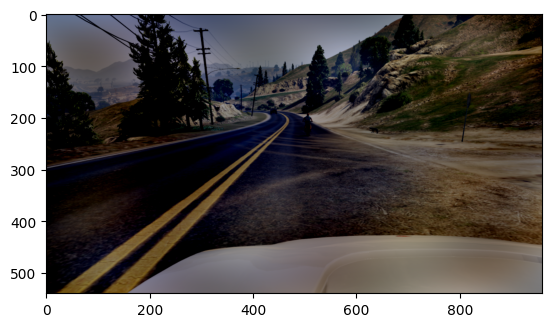

In [9]:
#print(applyStyle(img,styles['T03_CS_J_U2'],11))
plt.imshow(applyStyle(img,styles['T03_CS_J_U2'],7).permute(1,2,0))
print(applyStyle(img,styles['T03_CS_J_U2'],7))

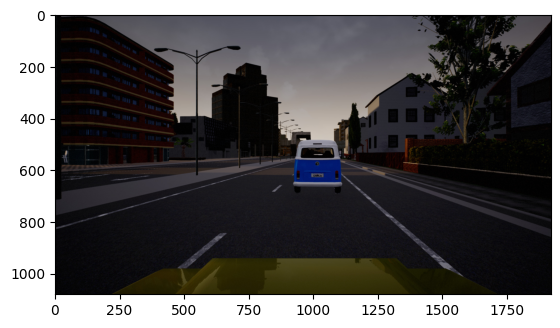

In [10]:

im=Image.open('data/idda/images/14227_T03_CS_J.jpg')
plt.imshow(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


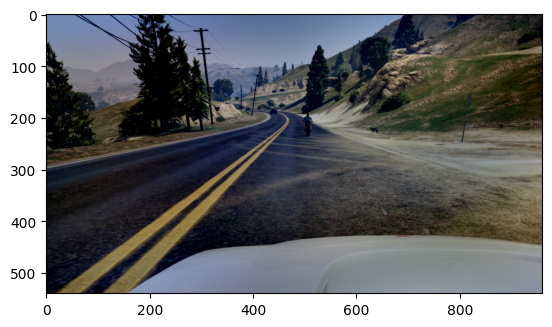

In [18]:
from utils.FDA import applyFDAstyles

trans=sstr.Compose([sstr.Resize((540,960)),sstr.ToTensor(),applyFDAstyles(styles=styles,n=5)])
im=Image.open('./data/GTA5/images/00028.png')
plt.imshow(trans(im).permute(1,2,0))

In [20]:
from utils.FDA import extractAvgStyleTxt
styleIddaTrainAvg=extractAvgStyleTxt(5)
styleGtaAvg=extractAvgStyleTxt(5,'data/GTA5/train.txt','data/GTA5/images/','')

c:\Users\ollob\anaconda3\envs\mldl23fl_6\lib\site-packages\torchvision\transforms\functional.py:442: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [21]:
styleDiffDomainAvg=extractAvgStyleTxt(5,'data/idda/test_diff_dom.txt')

In [22]:
print(styleIddaTrainAvg)
print(styleDiffDomainAvg)
print(styleGtaAvg)

{'pos': tensor([[[166581.0469,  27293.9199,   9240.3301],
         [ 41547.4883,  14223.8779,   8243.9570],
         [ 19153.9941,   8775.0215,   5521.4224]],

        [[151759.1406,  25236.2656,   9243.3760],
         [ 38199.6367,  14507.4912,   7980.1284],
         [ 22902.5527,   8606.8467,   5619.2583]],

        [[149820.6875,  25500.6543,   9196.9326],
         [ 37587.4453,  14405.9287,   7800.5767],
         [ 23585.5020,   8465.2998,   5724.1382]]]), 'neg': tensor([[[19153.9902,  9289.1953,  5806.2612],
         [41547.4883, 13977.4863,  7816.2817]],

        [[22902.5527,  8973.3896,  5575.6724],
         [38199.6367, 14388.5654,  7319.7500]],

        [[23585.5059,  8870.2461,  5611.3652],
         [37587.4453, 14161.6816,  7287.7573]]])}
{'pos': tensor([[[136523.9844,  25252.9160,   7919.3110],
         [ 33633.1445,   9829.7217,   5593.6162],
         [ 18628.1562,   7834.7163,   4526.9360]],

        [[129544.6719,  22730.2266,   8031.2339],
         [ 30353.7090,   9623

In [23]:
import torch
print(((torch.square(styleIddaTrainAvg['pos']-styleGtaAvg['pos'])).sum()+(torch.square(styleIddaTrainAvg['neg']-styleGtaAvg['neg'])).sum())/(styleGtaAvg['pos'].square().sum()+styleGtaAvg['neg'].square().sum()))

print(((torch.square(styleDiffDomainAvg['pos']-styleGtaAvg['pos'])).sum()+(torch.square(styleDiffDomainAvg['neg']-styleGtaAvg['neg'])).sum())/(styleGtaAvg['pos'].square().sum()+styleGtaAvg['neg'].square().sum()))


tensor(0.0857)
tensor(0.1562)
